# Emotion Detecetion

## Importing Libraries

In [1]:
#!pip install tensorflow



In [11]:
# Import necessary modules for data manipulation and visualization
import matplotlib.pyplot as plt  # Module for plotting
from glob import glob  # Module for file searching
import cv2  # OpenCV module for image processing
import random  # Module for random selection
import os  # Module for operating system functionalities
%matplotlib inline 
# Magic command to display plots inline within Jupyter notebooks

# Import modules for building and training the neural network model
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Module for data augmentation
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D  # Modules for building neural network layers
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D  # Additional layers for neural network
from tensorflow.keras.models import Model, Sequential  # Modules for defining neural network models
from tensorflow.keras.optimizers import Adam  # Optimizer for training the model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau  # Callbacks during model training
from tensorflow.keras.utils import plot_model  # Utility for plotting model architecture

# Import modules for display purposes within Jupyter notebooks
from IPython.display import SVG, Image  # Modules for displaying SVG images and images in notebooks
import tensorflow as tf  # TensorFlow library for deep learning
print("Tensorflow version", tf.__version__)  # Print TensorFlow version


Tensorflow version 2.11.0


# Exploring Dataset

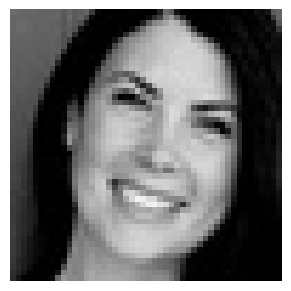

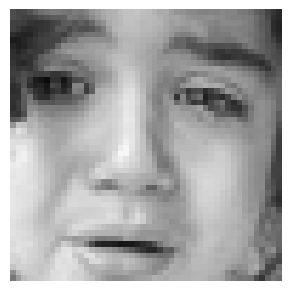

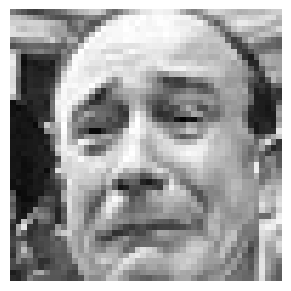

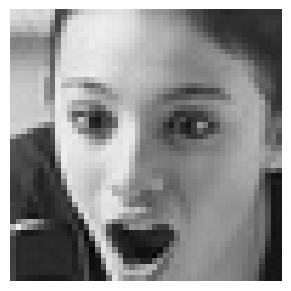

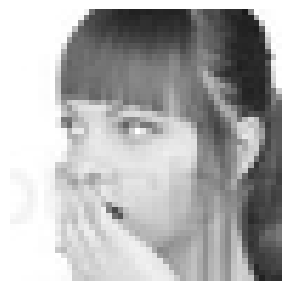

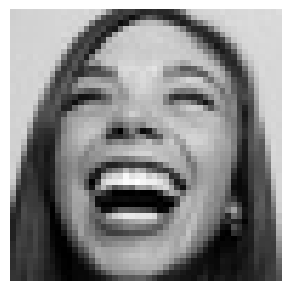

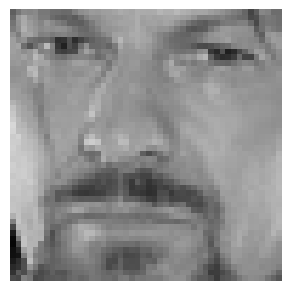

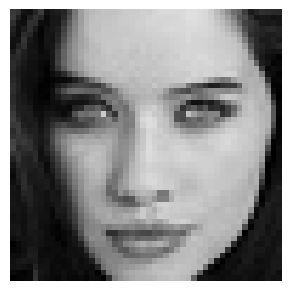

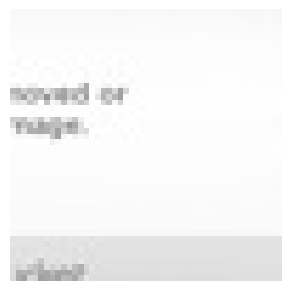

In [12]:
images=glob("train/**/**")# Use glob to recursively search for all files in the "train" directory
for i in range(9):
    image=random.choice(images)
    plt.figure(figsize=(12,12))# Create a Matplotlib figure with a size of 12x12 inches
    plt.subplot(331+i) # Add a subplot to the figure, indexing from 1 to 9
    plt.imshow(cv2.imread(image));plt.axis('off')# Turn off axis for cleaner display

# Preparing data for Training 

In [13]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",
                                                   target_size=(img_size, img_size),  
                                                   color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode="categorical", 
                                                   shuffle=True) 


datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/",
                                                     target_size=(img_size, img_size), 
                                                     color_mode="grayscale", 
                                                     batch_size=batch_size, 
                                                     class_mode="categorical",  
                                                     shuffle=True)  


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


# Defining Model

In [15]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x
    
 



In [16]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    
    x = Activation("relu")(x)
    x = Dropout(0.25)(x)
    
    return x

In [20]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(inputs,64,(5,5))
    conv_3 = Convolution(inputs,128,(3,3))
    
    flatten = Flatten()(conv_3)
    
    dense_1 = Dense_f(flatten,256)
    
    output = Dense(7, activation = "softmax")(dense_1)
    model = Model(inputs = [inputs],outputs = [output])
    
    model.compile(loss = ['categorical_crossentropy'], optimizer = "adam", metrics = ['accuracy'])
    
    return model
    

In [21]:
model = model_fer((48,48,1))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       1280      
                                                                 
 batch_normalization_2 (Batc  (None, 48, 48, 128)      512       
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 48, 48, 128)       0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 128)      0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 24, 24, 128)       0     

In [22]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5",monitor = 'val_accuracy',save_weights_only = True, mode = 'max', verbose = 1)
callbacks = [checkpoint]

# Training the Model 

**The next cells take more time to complete**

In [24]:
history = model.fit(
x = train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs,
validation_data = validation_generator,
validation_steps = validation_steps,
callbacks = callbacks)

Epoch 1/15
448/448 [==============================] - ETA: 0s - loss: 1.6623 - accuracy: 0.3705
Epoch 1: saving model to model_weights.h5
448/448 [==============================] - 195s 433ms/step - loss: 1.6623 - accuracy: 0.3705 - val_loss: 1.6515 - val_accuracy: 0.3421
Epoch 2/15
448/448 [==============================] - ETA: 0s - loss: 1.3588 - accuracy: 0.4816
Epoch 2: saving model to model_weights.h5
448/448 [==============================] - 181s 405ms/step - loss: 1.3588 - accuracy: 0.4816 - val_loss: 1.5258 - val_accuracy: 0.4249
Epoch 3/15
448/448 [==============================] - ETA: 0s - loss: 1.1957 - accuracy: 0.5540
Epoch 3: saving model to model_weights.h5
448/448 [==============================] - 184s 410ms/step - loss: 1.1957 - accuracy: 0.5540 - val_loss: 1.5183 - val_accuracy: 0.4217
Epoch 4/15
448/448 [==============================] - ETA: 0s - loss: 1.0659 - accuracy: 0.6087
Epoch 4: saving model to model_weights.h5
448/448 [==============================] - 

**Model Evaluation**

In [27]:
model.evaluate(validation_generator)

113/113 [==============================] - 7s 62ms/step - loss: 1.9405 - accuracy: 0.4826


[1.9405179023742676, 0.4825856685638428]

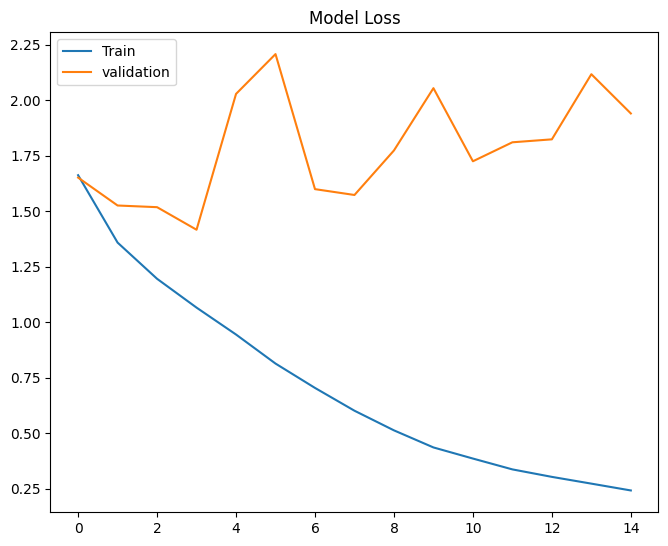

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.legend(["Train","validation"],loc = 'upper left')
plt.subplots_adjust(top = 1.0, bottom = 0.0, right = 0.95, left = 0.0, hspace = 0.25, wspace = 0.35)


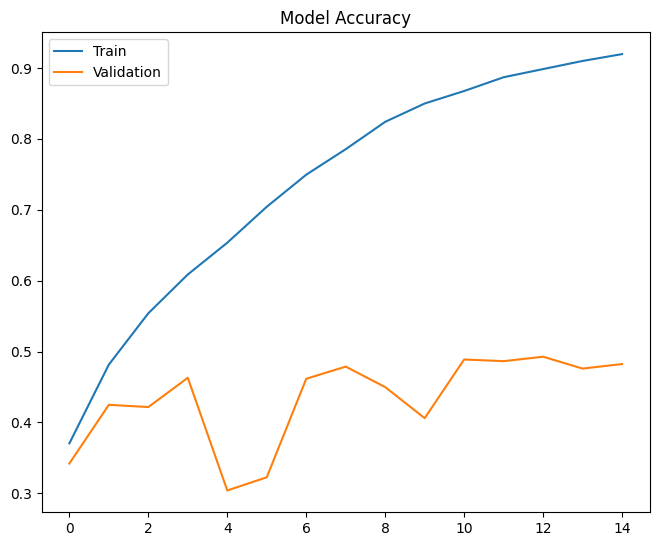

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.legend(["Train","Validation"],loc = 'upper left')
plt.subplots_adjust(top = 1.0, bottom = 0.0, right = 0.95, left = 0.0, hspace = 0.25, wspace = 0.35)

In [32]:
model_json = model.to_json()
with open('model_a.json','w') as json_file:
        json_file.write(model_json)
        
    